In [36]:
import pandas as pd

In [37]:
import matplotlib.pyplot as plt

In [38]:
import seaborn as ses

In [39]:
df = pd.read_csv('height_weight_dataset.csv')

In [40]:
df

,Gender,Height,Weight
0,Male,5.6873,65.8972
1,Female,4.6473,60.8720
2,Female,3.6873,50.9720
3,Male,5.8700,65.9720
4,Female,5.6800,55.8120
5,Male,1.6730,65.8972
6,Male,5.6873,98.8972
7,Male,3.6873,25.8972
8,Female,5.0873,65.6445
9,Male,6.6873,70.8972


In [41]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [42]:
df.shape

(16, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

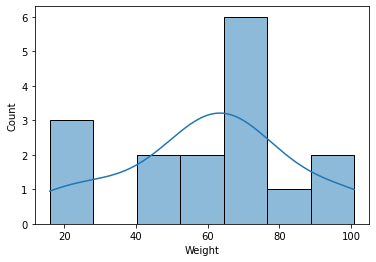

In [43]:
ses.histplot(df['Weight'], kde=True)

In [44]:
mean_val = df['Weight'].mean()
mean_val

60.40728125

In [45]:
std_val = df['Weight'].std()

In [46]:
std_val

24.04589945691971

In [47]:
pos_std_2 = mean_val+(2*std_val)

In [48]:
pos_std_2

108.49908016383941

In [49]:
neg_std_2 = mean_val - (2*std_val)
neg_std_2

12.315482336160578

In [50]:
df[df['Weight'] > pos_std_2 ]

,Gender,Height,Weight


In [51]:
df[df['Weight'] < neg_std_2 ]

,Gender,Height,Weight


In [52]:
remove_outlier_colmn = df[(df['Weight'] < pos_std_2) & (df['Weight'] > neg_std_2)]

In [53]:
remove_outlier_colmn.shape

(16, 3)

In [56]:
#One-Hot Encoding
dummy_variables = pd.get_dummies(remove_outlier_colmn['Gender'], drop_first=True)

In [57]:
dummy_variables.head()

,Male
0,1
1,0
2,0
3,1
4,0


In [58]:
new_df = remove_outlier_colmn.drop('Gender', axis=1)

In [59]:
new_df.head()

,Height,Weight
0,5.6873,65.8972
1,4.6473,60.8720
2,3.6873,50.9720
3,5.8700,65.9720
4,5.6800,55.8120


In [60]:
df = pd.concat([new_df,dummy_variables],axis=1)

In [61]:
df.head()

,Height,Weight,Male
0,5.6873,65.8972,1
1,4.6473,60.8720,0
2,3.6873,50.9720,0
3,5.8700,65.9720,1
4,5.6800,55.8120,0


In [62]:
x = df.drop('Height',axis=1)

In [63]:
x.head()

,Weight,Male
0,65.8972,1
1,60.8720,0
2,50.9720,0
3,65.9720,1
4,55.8120,0


In [64]:
y = df['Height']

In [65]:
y.head()

0    5.6873
1    4.6473
2    3.6873
3    5.8700
4    5.6800
Name: Height, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .30, random_state = 42) 

In [68]:
xtrain.shape

(11, 2)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [72]:
lr.coef_

array([ 0.04569237, -0.30972255])

In [73]:
lr.intercept_

2.71932424027632

In [74]:
lr.predict(xtest)

array([5.42060071, 5.50070998, 5.42060071, 4.81647593, 3.59632383])

In [75]:
lr.score(xtest,ytest)

-0.8619387560703651

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
pred=lr.predict(xtest)

In [80]:
mean_squared_error(ytest,pred)

4.341859994640513

In [82]:
r2_score(ytest,pred)

-0.8619387560703651